In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X,y = load_diabetes(return_X_y=True)

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [7]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [8]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [9]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568969

In [11]:
X_train.shape

(353, 10)

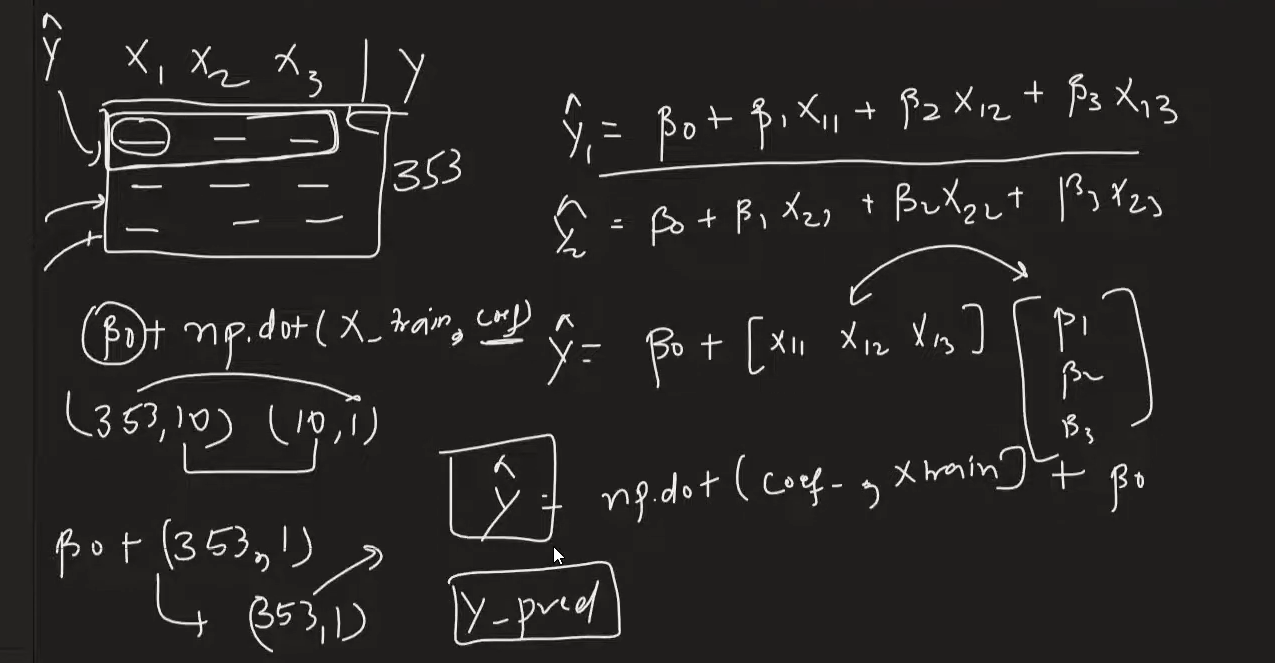

In [10]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)

In [13]:
gdr.fit(X_train,y_train)

130.52896930987225 [ 2.63772241  1.19060622  5.06046267  4.31375004  2.44715577  1.99246132
 -1.48838841  3.60218122  5.24193975  3.51394813]


In [16]:
gdr.fit(X_train,y_train)


152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [17]:
y_pred = gdr.predict(X_test)


In [18]:
r2_score(y_test,y_pred)


0.4534503034722803